In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('spam.csv', encoding='cp1252') #encoding utf-8 is not supported so using cp1252
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

## 1. DATA CLEANING

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
#last 3 colums are mostly null so dropping them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#renaming v1 and v2 for better readibility
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# changing target value to numerical data, using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()
# ham = 0 and spam = 1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# checking for duplicate values
df.duplicated().sum()

403

In [16]:
# removing duplicates
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EXPLORATORY DATA ANALYSIS

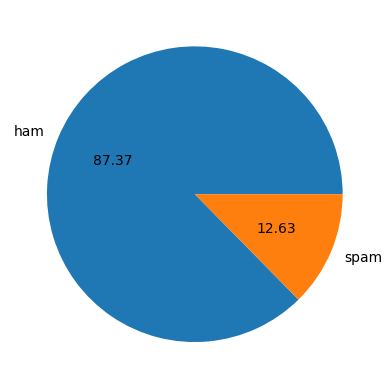

In [19]:
# plotting a pie chart to see the percentage of ham and spam data
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()


In [20]:
# tokenizing the texts into characters, words and sentences
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SUNIL
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# finding the number of charaacters, words and sentences in text
df['num_char'] = df['text'].apply(len) # simply len is equal to the num of characters
df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

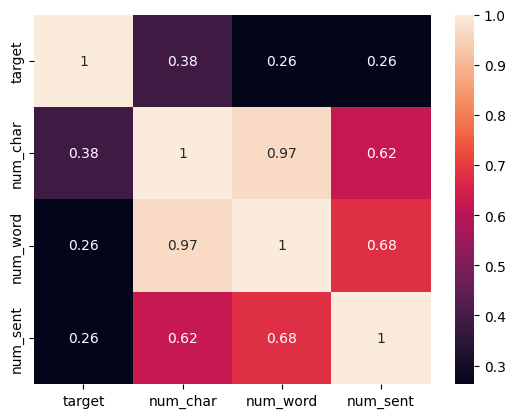

In [131]:
# plotting heatmap to check pearson correlation between cols (excluding text)
import seaborn as sbn
num_df = df.select_dtypes(include=[np.number]) # selecting only numberic cols
sbn.heatmap(num_df.corr(), annot=True)

conclusion: num_char, num_word and num_sent have strong correlation, and among these, num_char has highest correlation with target so we'll use character data for our model

## 3. DATA PREPROCESSING

In [26]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def text_process(text):
    text = text.lower() #lowercasing
    text = nltk.word_tokenize(text) #tokenizing into words
    
    y = []
    for i in text:
        if i.isalnum(): 
            y.append(i) # append only if alphanumeric
    
    text = y[:] #cloning
    y.clear()
    
    for i in text: # removing stop words and punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # stemming
        y.append(ps.stem(i))
    
            
    return " ".join(y)
    

In [28]:
sample_text = "hello how!@#$%^&*()_+ are you today?=="
p_text = text_process(sample_text)
print(p_text)

hello today


In [31]:
df['processed_text'] = df['text'].apply(text_process)
df.head()

,target,text,num_char,num_word,num_sent,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


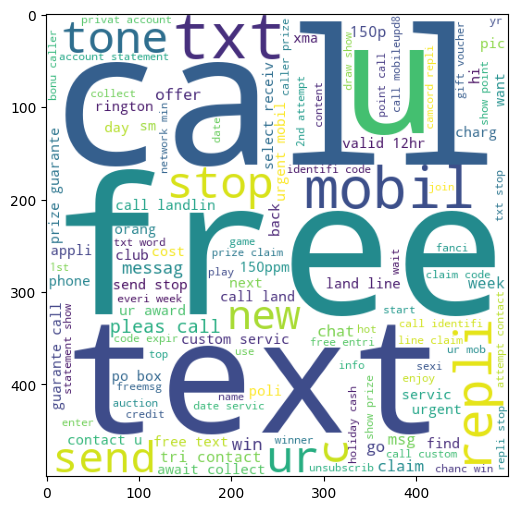

In [32]:
# Let's see how word cloud for ham and spam look like
# for spam
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['processed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

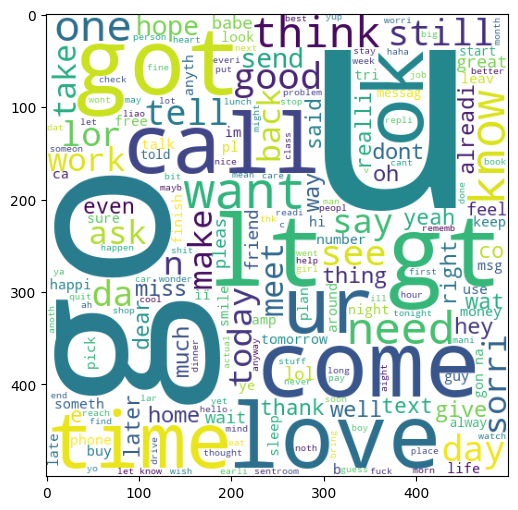

In [68]:
# for ham
ham_wc = wc.generate(df[df['target'] == 0]['processed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

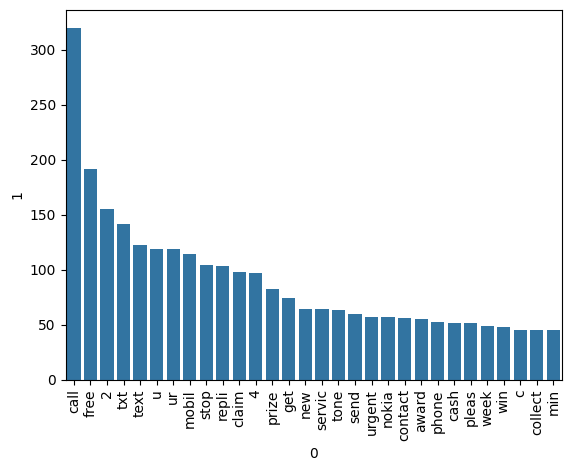

In [33]:
# creating barplot to show the count of top 30 most common words
# barplot for spam
from collections import Counter
import seaborn as sbn

spam_corpus = []
for msg in df[df['target'] == 1]['processed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word) 

sbn.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

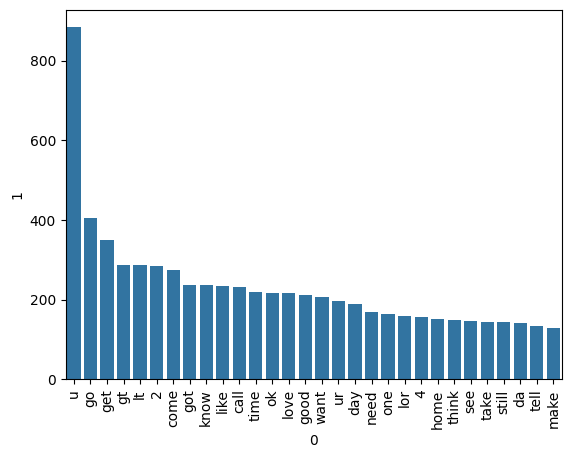

In [34]:
# bar plot for ham
ham_corpus = []
for msg in df[df['target'] == 0]['processed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
sbn.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. BUILDING MODEL

In [44]:
# Encoding text data into numerical data using tfid vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['processed_text']).toarray()
X.shape

(5169, 3000)

In [45]:
y = df['target'].values

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
# Multinomial Naive Bayes gives highest precision (min.FPs) so we're using it
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
mnb = MultinomialNB()

In [48]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [49]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))